In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

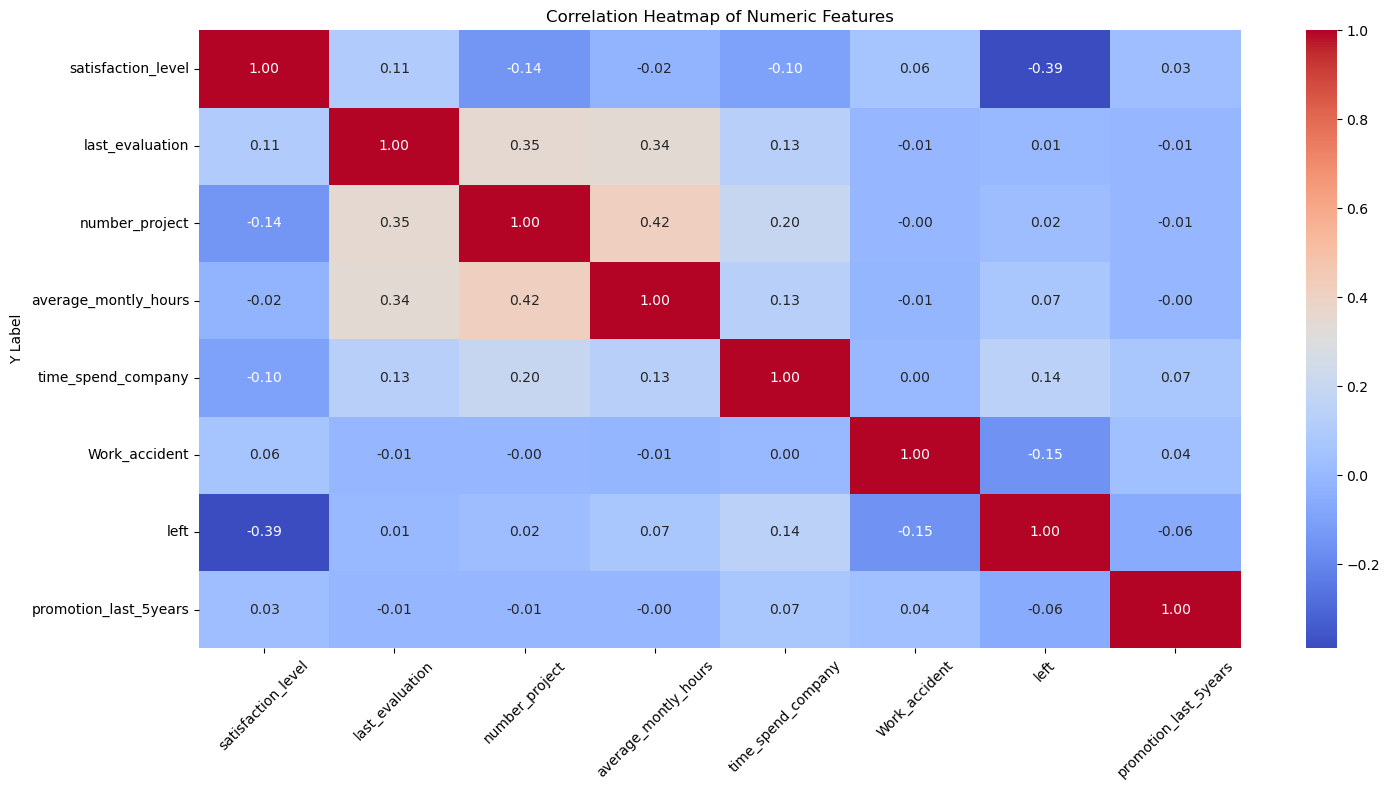

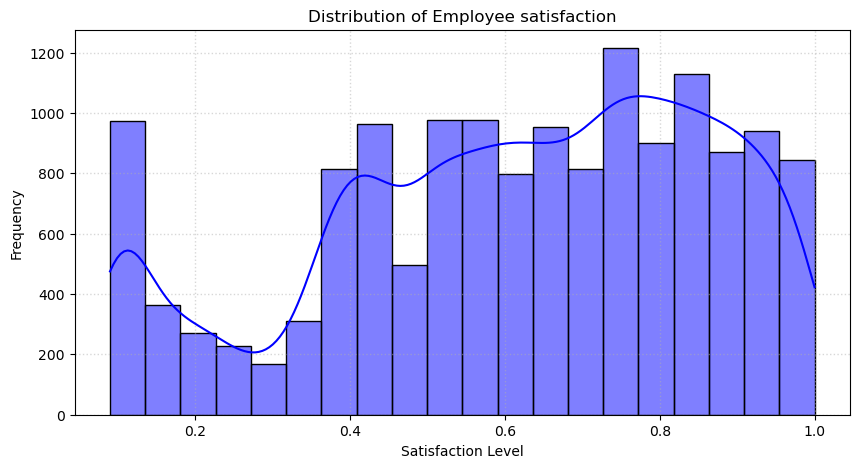

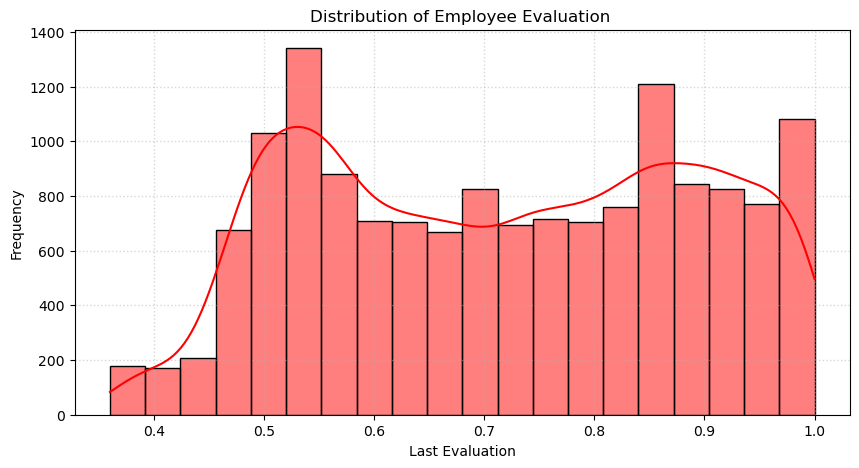

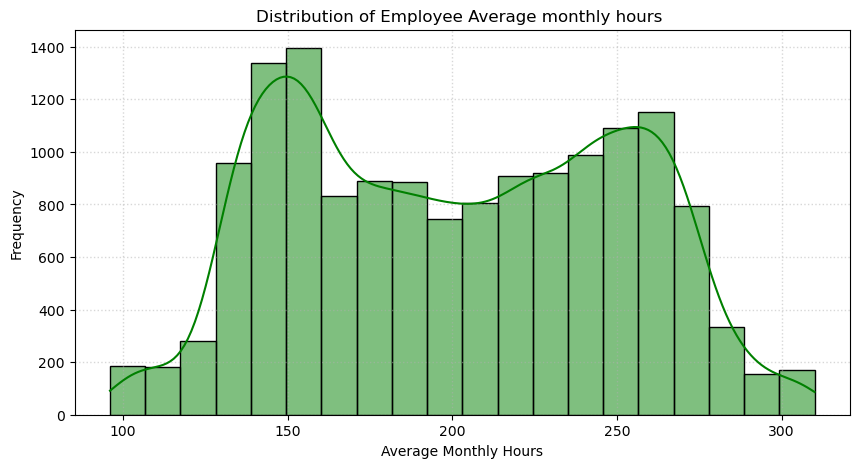

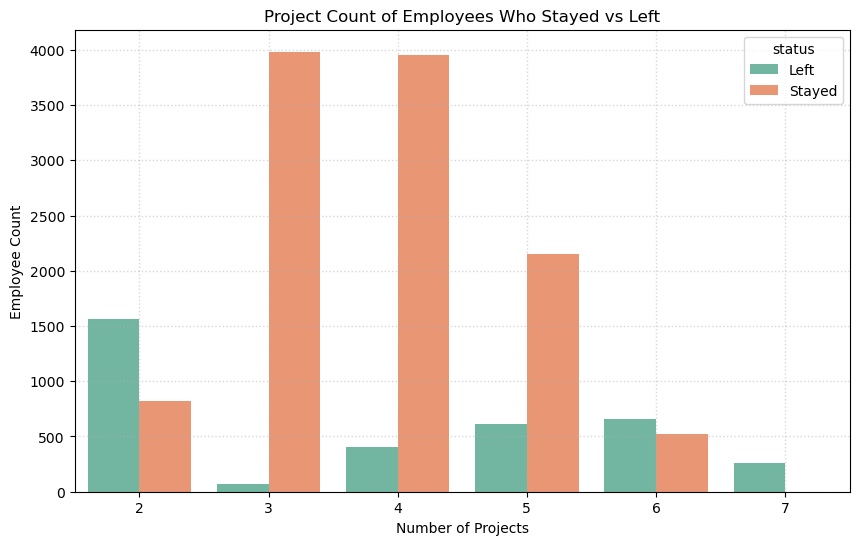

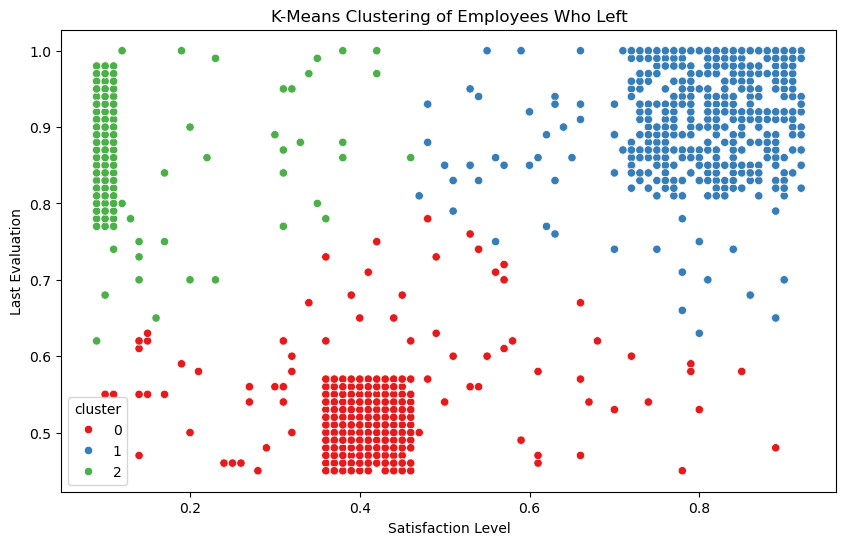

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'status'],
      dtype='object')
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'status'],
      dtype='object')
   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0       

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--------Logistic Regression Classification Report On Test:--------
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000


--------Random Forest Classification Report On Test:--------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.97      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


--------Gradient Boosting Classification Report On Test:--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2291
           1       0.91      0.94      0.

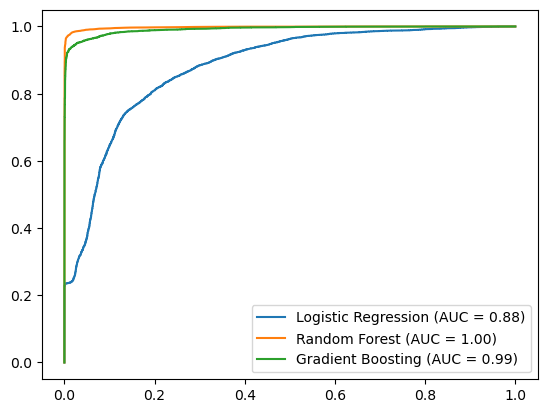

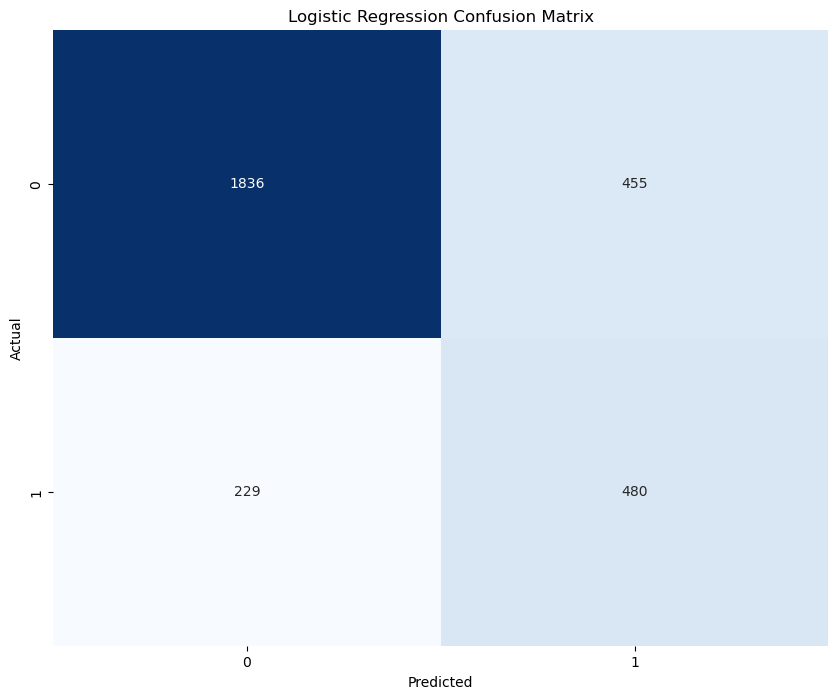


--------Random Forest Regression Confusion Matrix:--------
[[2273   18]
 [  16  693]]


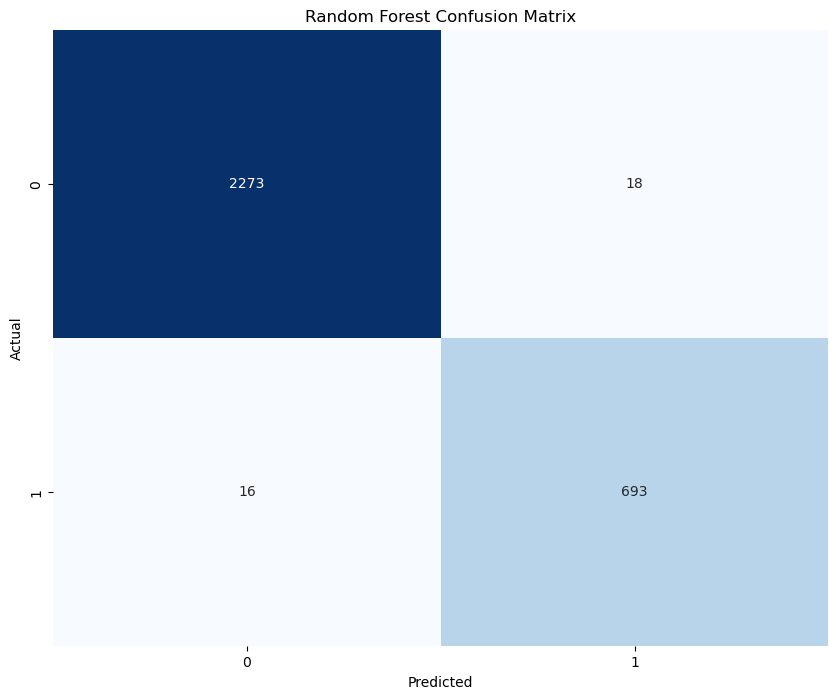


--------Gradient Boosting Regression Confusion Matrix:--------
[[2229   62]
 [  45  664]]


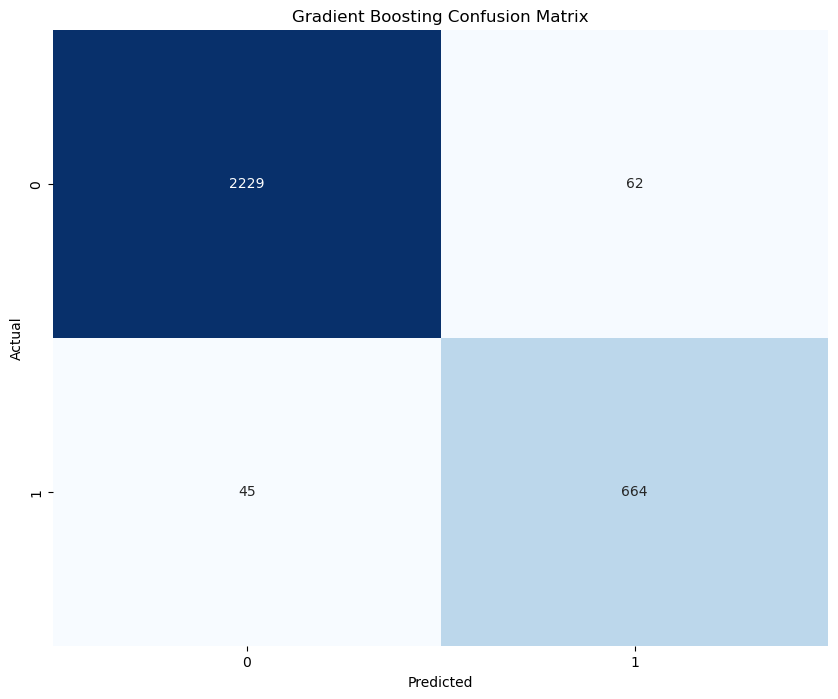

[0.01 0.01 0.   ... 0.99 0.01 0.01]
Employee count in each zone:
Zone
Green     1392
Red        640
Yellow     123
Orange      59
Name: count, dtype: int64


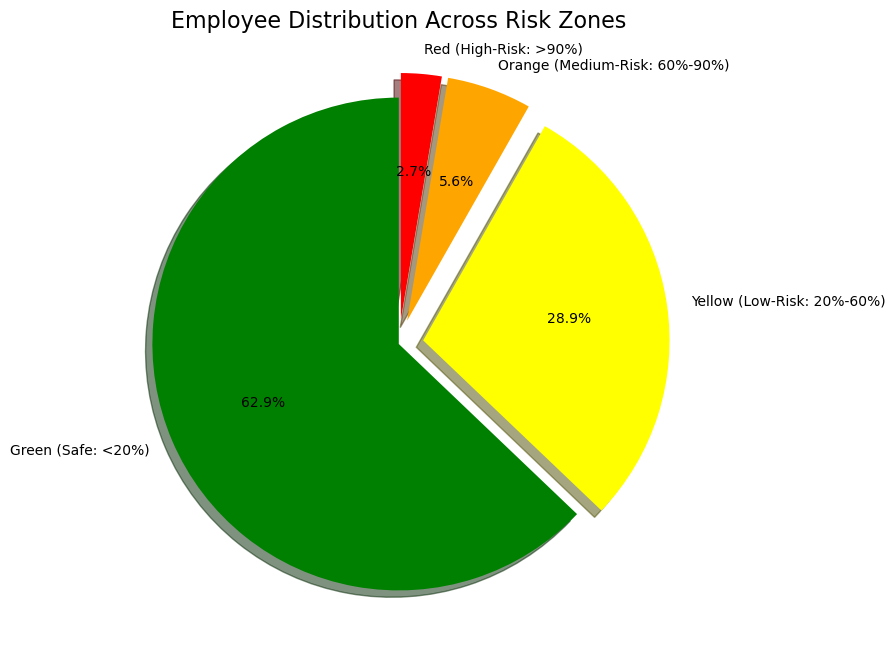

In [17]:

df=pd.read_csv('HR_comma_sep.csv')
print(df.head())
print(df.info())
print(df.describe())

print(df.isna().sum())
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.ylabel("Y Label", labelpad=5)
plt.show()


plt.figure(figsize=(10, 5))
ax =sns.histplot(df['satisfaction_level'],bins=20,kde=True,color="b")
ax.grid(True, linestyle=':', linewidth=1, zorder=0, alpha=0.5)
plt.title("Distribution of Employee satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
ax =sns.histplot(df['last_evaluation'],bins=20,kde=True,color="red")
ax.grid(True, linestyle=':', linewidth=1, zorder=0, alpha=0.5)
plt.title("Distribution of Employee Evaluation ")
plt.xlabel("Last Evaluation")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
ax =sns.histplot(df['average_montly_hours'],bins=20,kde=True,color="green")
ax.grid(True, linestyle=':', linewidth=1, zorder=0, alpha=0.5)
plt.title("Distribution of Employee Average monthly hours ")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Frequency")
plt.show()


df['status'] = df['left'].map({0: 'Stayed', 1: 'Left'})
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='status', data=df, palette="Set2")
plt.title("Project Count of Employees Who Stayed vs Left")
plt.xlabel("Number of Projects")
plt.ylabel("Employee Count")
plt.grid(True, linestyle=':', linewidth=1, zorder=0, alpha=0.5)
plt.show()



df_left = df[df['left'] == 1].copy()
x = df_left[['satisfaction_level', 'last_evaluation']]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
kmeans = KMeans(n_clusters=3, random_state=42)

df_left['cluster']=kmeans.fit_predict(x_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='Set1')
plt.title('K-Means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()


# 5
print(df.columns)
df.rename(columns={'sales':'department'},inplace=True)
print(df.columns)
cat_df = pd.get_dummies(df[['department', 'salary']])
cat_df = cat_df.astype(int)
num_df=df.select_dtypes(include='number')

df_processed=pd.concat([cat_df,num_df],axis=1)

print(df_processed.head())
sum_counts=df['left'].value_counts()
print("\nvalue counts of different values in left before SMOTE")
print(sum_counts)

smote=SMOTE(random_state=123)
x=df_processed.drop('left',axis=1)
y=df['left']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("\nvalue counts of different values in left after SMOTE")
print(y_train_smote.value_counts())



# training set evaluation
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

log_reg = LogisticRegression(random_state=123, max_iter=1000)
y_pred_log_regg = cross_val_predict(log_reg, x_train_smote_scaled, y_train_smote, cv=5)

print("\n--------Logistic Regression Classification Report:--------")
print(classification_report(y_train_smote, y_pred_log_regg))

random_cla=RandomForestClassifier(random_state=123)
y_pred_random_cla=cross_val_predict(random_cla, x_train_smote_scaled,y_train_smote,cv=5)
print("\n--------Random Forest Classification Report:--------")
print(classification_report(y_train_smote, y_pred_random_cla))



gradient_boost=GradientBoostingClassifier(random_state=123)
y_pred_gradient=cross_val_predict(gradient_boost,x_train_smote_scaled,y_train_smote,cv=5)
print("\n--------Gradient Boosting Classification Report:--------")
print(classification_report(y_train_smote,y_pred_gradient))




# test set evaluation
log_reg.fit(x_train_smote,y_train_smote)
y_test_pred_log=log_reg.predict(x_test)
print("\n--------Logistic Regression Classification Report On Test:--------")
print(classification_report(y_test,y_test_pred_log))


random_cla.fit(x_train_smote,y_train_smote)
y_test_pred_random=random_cla.predict(x_test)
print("\n--------Random Forest Classification Report On Test:--------")
print(classification_report(y_test,y_test_pred_random))

gradient_boost.fit(x_train_smote,y_train_smote)
y_test_pred_gradient=gradient_boost.predict(x_test)
print("\n--------Gradient Boosting Classification Report On Test:--------")
print(classification_report(y_test,y_test_pred_gradient))




# ROC CURVES
scaler = StandardScaler()
x_train_smote_scaled = scaler.fit_transform(x_train_smote)

y_pred_log_prob=cross_val_predict(log_reg, x_train_smote_scaled, y_train_smote, cv=5, method='predict_proba')[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_train_smote, y_pred_log_prob)
auc_log_reg = roc_auc_score(y_train_smote, y_pred_log_prob)

y_pred_rf_prob=cross_val_predict(random_cla,x_train_smote_scaled, y_train_smote, cv=5, method='predict_proba')[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_train_smote, y_pred_rf_prob)
auc_rf=roc_auc_score(y_train_smote,y_pred_rf_prob)


y_pred_gb_prob=cross_val_predict(gradient_boost,x_train_smote_scaled, y_train_smote, cv=5, method='predict_proba')[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_train_smote, y_pred_gb_prob)
auc_gb=roc_auc_score(y_train_smote, y_pred_gb_prob)



plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.legend()


# confusion matrix

confusion_matrix_log=confusion_matrix(y_test,y_test_pred_log)
print("\n--------Logistic Regression Confusion Matrix:--------")
print(confusion_matrix_log)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_log, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


confusion_matrix_random=confusion_matrix(y_test,y_test_pred_random)
print("\n--------Random Forest Regression Confusion Matrix:--------")
print(confusion_matrix_random)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_random, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

confusion_matrix_gradient=confusion_matrix(y_test,y_test_pred_gradient)
print("\n--------Gradient Boosting Regression Confusion Matrix:--------")
print(confusion_matrix_gradient)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_gradient, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# 7
random_cla.fit(x_train_smote, y_train_smote)
y_test_prob=random_cla.predict_proba(x_test)[:,1]
print(y_test_prob)


test_data_zones = pd.DataFrame({'Probability': y_test_prob})
test_data_zones['Zone'] = pd.cut(test_data_zones['Probability'], bins=[0, 0.2, 0.6, 0.9, 1], labels=['Green', 'Yellow', 'Orange', 'Red'])

zone_counts = test_data_zones['Zone'].value_counts()
print("Employee count in each zone:")
print(zone_counts)
labels = ['Green (Safe: <20%)', 'Yellow (Low-Risk: 20%-60%)', 'Orange (Medium-Risk: 60%-90%)', 'Red (High-Risk: >90%)']
colors = ['green', 'yellow', 'orange', 'red']
plt.figure(figsize=(8, 8))
plt.pie(zone_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0.1, 0.1], shadow=True)
plt.title('Employee Distribution Across Risk Zones', fontsize=16)
plt.show()